# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_8096/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

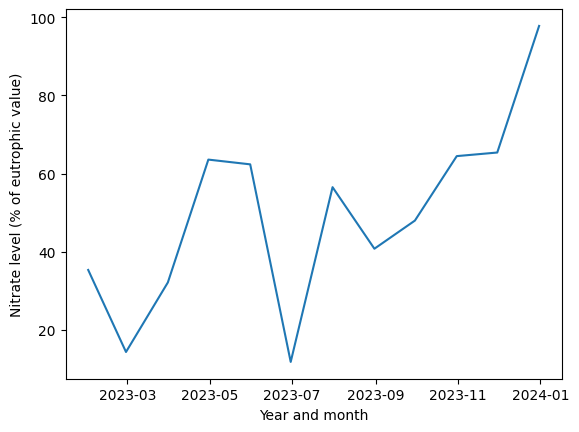

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_8096/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

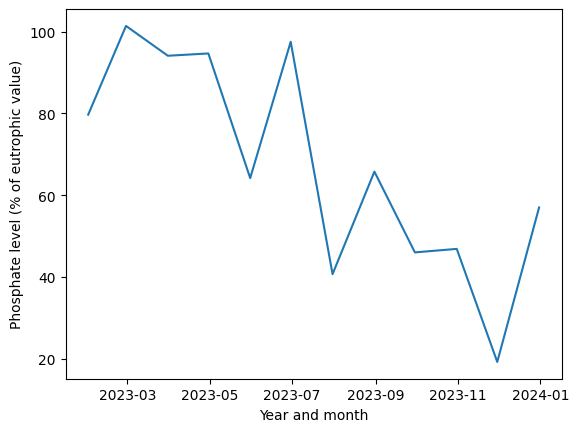

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

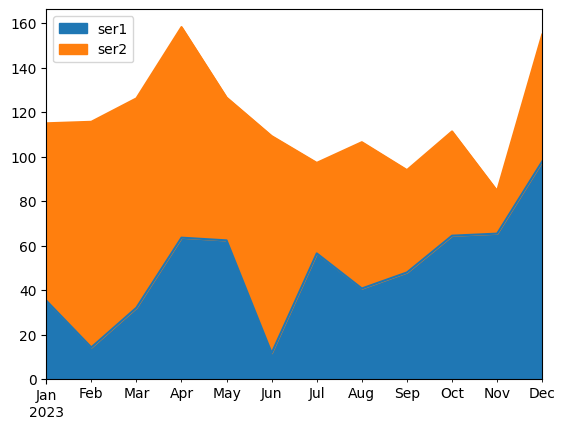

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [18]:
# Datasets
security_data = pd.read_csv("cybersecurity_attacks.csv", header=0)
security_object_columns = [
    'User Information', 'Geo-location Data', 'Device Information', 'Proxy Information', 
    'Payload Data', 'Source IP', 'Source Port', 
    'Destination IP', 'Destination Port' ]
security_numeric_columns = [
    'Packet Length', 'Anomaly Scores' ]
for column in security_data.columns:
    if column not in security_object_columns and column not in security_numeric_columns:
        security_data[column] = security_data[column].astype('category')
    if column in security_object_columns:
        security_data[column] = security_data[column].astype('object')
    if column in security_numeric_columns:
        security_data[column] = security_data[column].astype('int')
security_data['Timestamp'] = pd.to_datetime(security_data['Timestamp'], errors='coerce')

UNSW_data = pd.read_csv("UNSW_NB15_training-set.csv", header=0)
UNSW_numeric_columns = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 
    'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',	'djit',	'swin',	'stcpb',	
    'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',	'dmean', 'trans_depth',	
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',	
    'ct_dst_sport_ltm',	'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',	'ct_src_ltm',
    'ct_srv_dst', 'rate' ]
for column in UNSW_data.columns:
    if column in UNSW_numeric_columns:
        UNSW_data[column] = UNSW_data[column].astype('int')
    else:
        UNSW_data[column] = UNSW_data[column].astype('category')

BETH_data = pd.read_csv("labelled_2021may-ubuntu-dns.csv", header=0)
BETH_numeric_columns = ['NumberOfAnswers', 'DnsResponseCode', 'sus', 'evil' ]
for column in BETH_data.columns:
    if column not in BETH_numeric_columns:
        BETH_data[column] = BETH_data[column].astype('category')
    if column in BETH_numeric_columns:
        BETH_data[column] = BETH_data[column].astype('int')
BETH_data = BETH_data.drop(columns=['DnsOpCode', 'DnsQueryNames'])
BETH_data['Timestamp'] = pd.to_datetime(BETH_data['Timestamp'], errors='coerce')

In [19]:
# Correlations
print("Security Correlations:", security_data[security_numeric_columns].corr())
print("UNSW:", UNSW_data[UNSW_numeric_columns].corr())
print("BETH:", BETH_data[BETH_numeric_columns].corr())

Security Correlations:                 Packet Length  Anomaly Scores
Packet Length        1.000000       -0.003524
Anomaly Scores      -0.003524        1.000000


UNSW:                         dur     spkts     dpkts    sbytes    dbytes      sttl  \
dur                1.000000  0.277586  0.214177  0.224600  0.170836  0.002188   
spkts              0.277586  1.000000  0.369554  0.965750  0.198324 -0.092536   
dpkts              0.214177  0.369554  1.000000  0.175834  0.976419 -0.163830   
sbytes             0.224600  0.965750  0.175834  1.000000  0.010036 -0.017866   
dbytes             0.170836  0.198324  0.976419  0.010036  1.000000 -0.114537   
sttl               0.002188 -0.092536 -0.163830 -0.017866 -0.114537  1.000000   
dttl               0.043110  0.054601  0.036483  0.049891  0.012537 -0.033338   
sload             -0.060725 -0.044194 -0.054145 -0.015228 -0.031266  0.252901   
dload             -0.038738  0.074440  0.133835 -0.006428  0.100923 -0.386224   
sloss              0.238415  0.973644  0.189060  0.995027  0.014561 -0.038088   
dloss              0.168766  0.198683  0.981506  0.007091  0.997109 -0.137737   
sinpkt             0.0

In [38]:
# High Correlation Function
def high_correlations(df, threshold=0.7):
    corr_matrix = df.corr()
    high_corr_pairs = []

    for i in range(len(corr_matrix.columns)): # Exclude Diagonal
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold: #Negatives
                high_corr_pairs.append((col1, col2, corr_value))
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

    if not high_corr_pairs:
        print(f"No variable pairs exceed the threshold of {threshold}")
    return high_corr_pairs 

print("Security Data Correlations:")
high_correlations(security_data[security_numeric_columns], threshold=0.6)
print("\nBETH Data Correlations:")
high_correlations(BETH_data[BETH_numeric_columns], threshold=0.6)

Security Data Correlations:
No variable pairs exceed the threshold of 0.6

BETH Data Correlations:
No variable pairs exceed the threshold of 0.6


[]

In [39]:
# NOTE: Correlations for UNSW Data
print("\nUNSW Data Correlations:")
high_correlations(UNSW_data[UNSW_numeric_columns], threshold=0.85)

# Lots of high correlations in this data


UNSW Data Correlations:


[('dbytes', 'dloss', np.float64(0.9971088501020646)),
 ('sbytes', 'sloss', np.float64(0.99502719113184)),
 ('dpkts', 'dloss', np.float64(0.9815064328008422)),
 ('ct_srv_src', 'ct_srv_dst', np.float64(0.9778491535974652)),
 ('dpkts', 'dbytes', np.float64(0.9764185516958216)),
 ('spkts', 'sloss', np.float64(0.9736439932787799)),
 ('spkts', 'sbytes', np.float64(0.9657497410287414)),
 ('ct_dst_ltm', 'ct_src_dport_ltm', np.float64(0.9604008284955233)),
 ('swin', 'dwin', np.float64(0.9601246970559344)),
 ('ct_dst_src_ltm', 'ct_srv_dst', np.float64(0.9410468630509295)),
 ('ct_srv_src', 'ct_dst_src_ltm', np.float64(0.9337952137616565)),
 ('ct_src_dport_ltm', 'ct_src_ltm', np.float64(0.9331720623302827)),
 ('ct_dst_ltm', 'ct_src_ltm', np.float64(0.9322524473427766)),
 ('ct_src_dport_ltm', 'ct_dst_sport_ltm', np.float64(0.9116374681078989)),
 ('ct_src_dport_ltm', 'ct_dst_src_ltm', np.float64(0.8760296727393694)),
 ('ct_dst_ltm', 'ct_dst_sport_ltm', np.float64(0.872184779699074)),
 ('ct_dst_ltm',

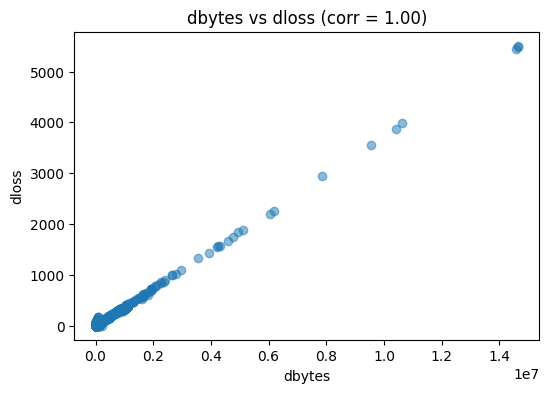

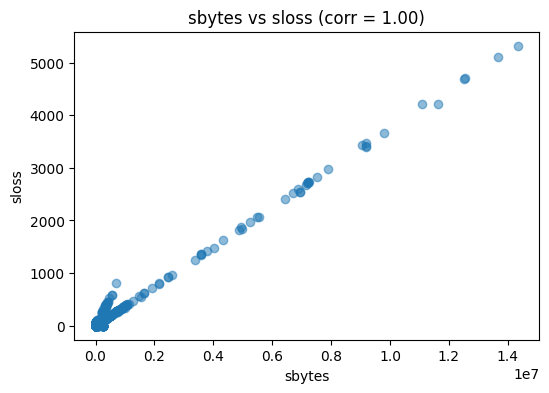

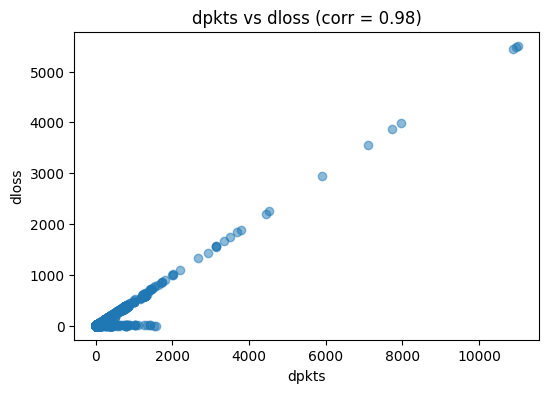

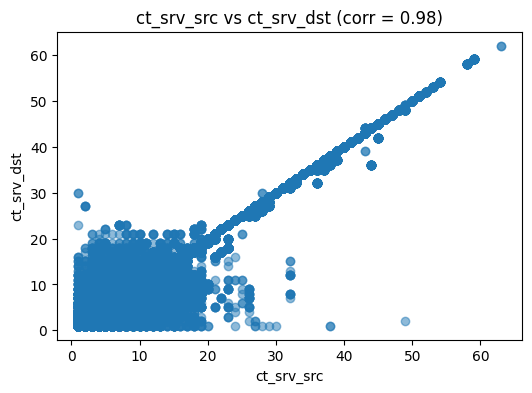

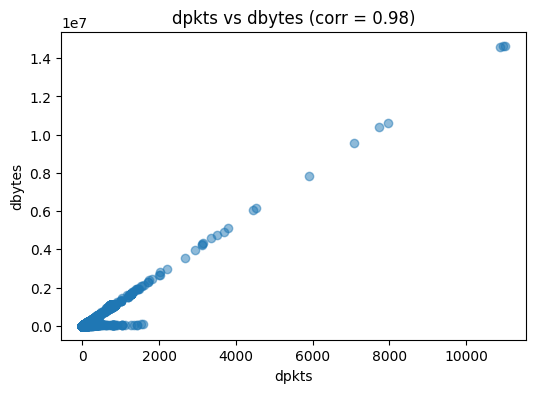

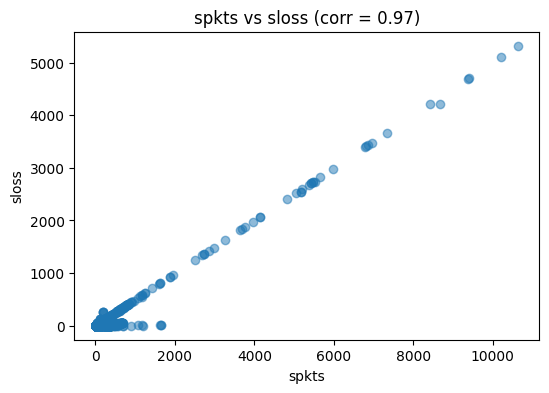

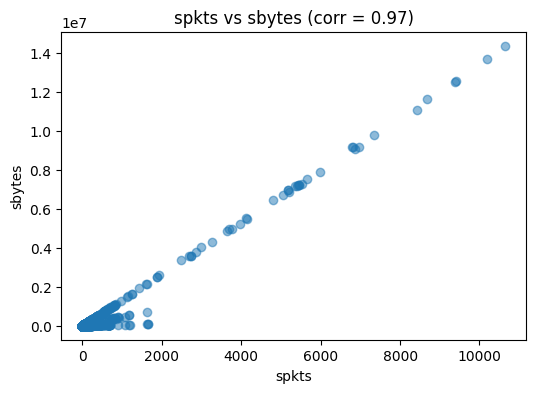

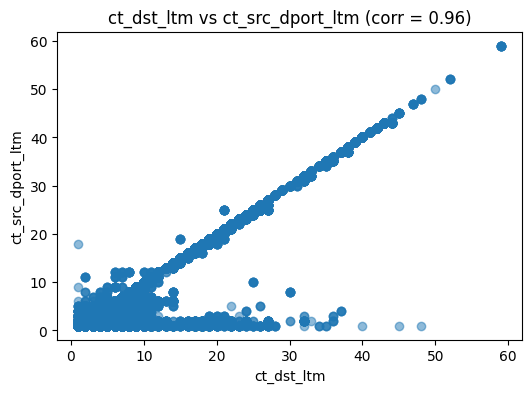

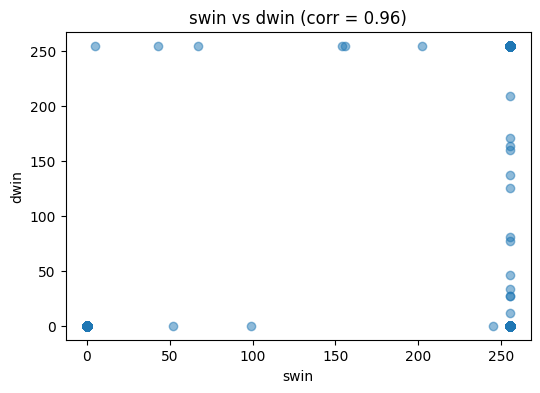

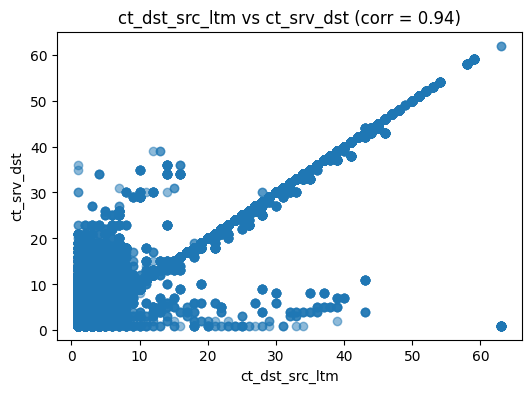

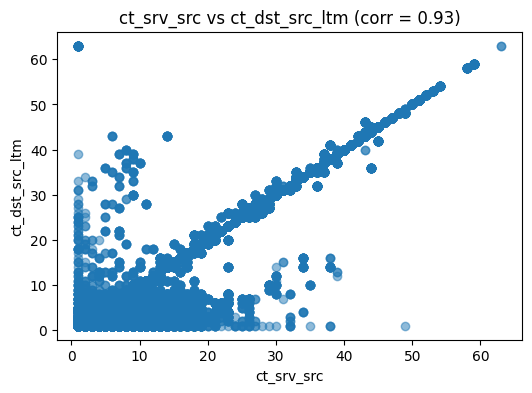

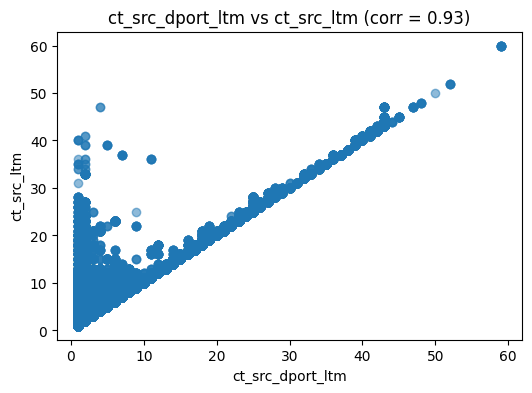

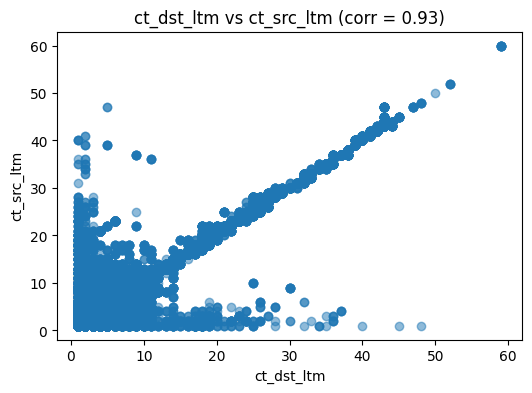

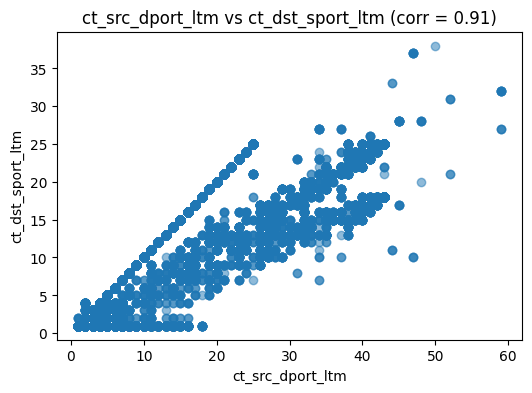

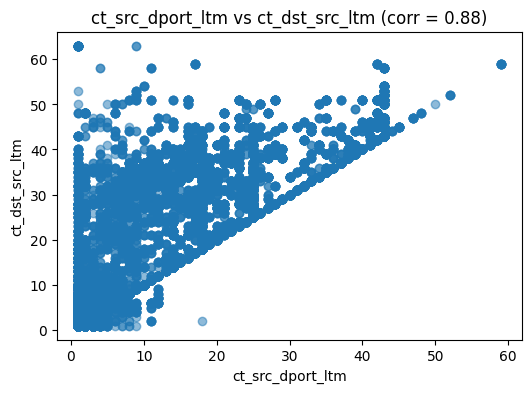

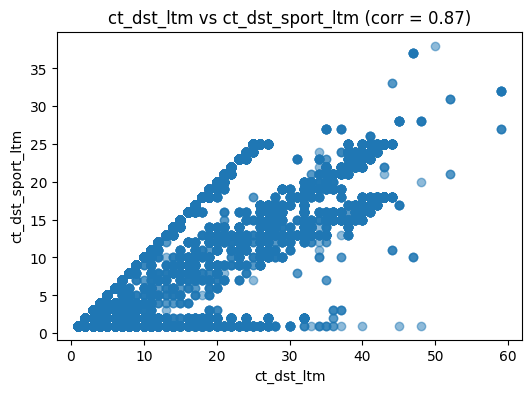

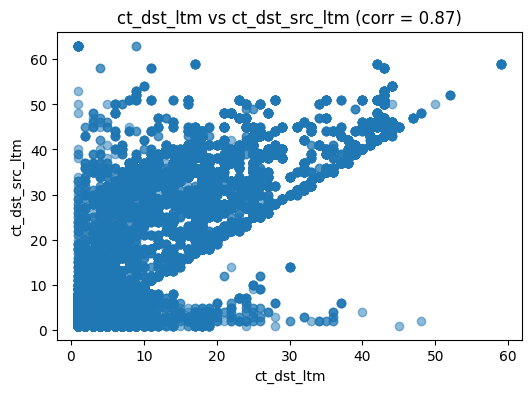

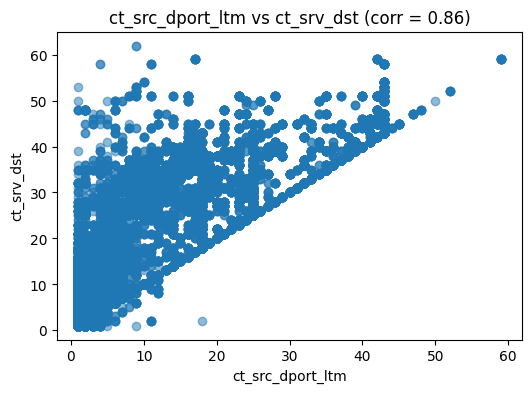

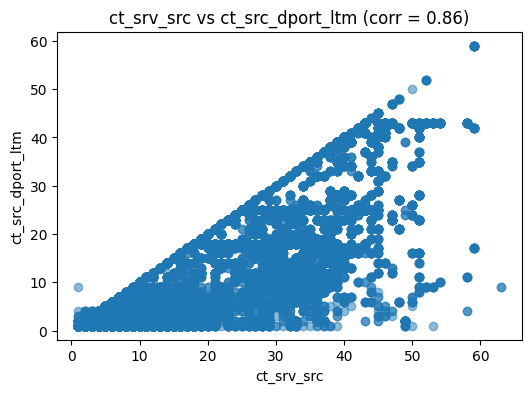

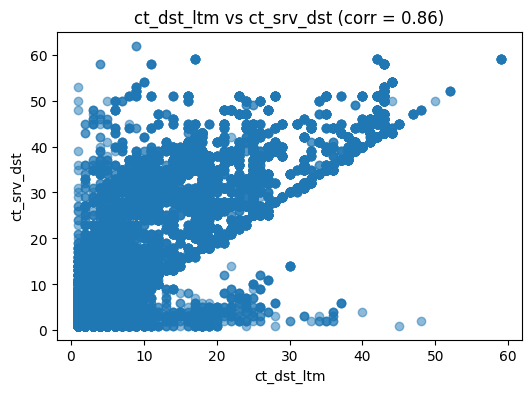

In [43]:
# UNSW Scatter Plots for High Correlations

high_corr_pairs_unsw = high_correlations(UNSW_data[UNSW_numeric_columns], threshold=0.85)

def plot_high_corr_pairs(df, high_corr_pairs):
    for col1, col2, corr in high_corr_pairs:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[col1], df[col2], alpha=0.5)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f"{col1} vs {col2} (corr = {corr:.2f})")
        plt.show()

plot_high_corr_pairs(UNSW_data, high_corr_pairs_unsw)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.